In [39]:
import os
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
from qiskit import QuantumCircuit,Aer,execute

In [40]:
def create_control_circuit(n_tunes):
    n_qubits=int(np.ceil(np.log2(n_tunes)))
    unused_states=[i for i in range(n_tunes+1,2**(int(n_qubits)+1))]
    circ=QuantumCircuit(n_qubits,n_qubits)
    '''Build circuit below'''
    circ.h(range(n_qubits-1))
    circ.measure(1,0)
    '''Circuit builr above this'''
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    result = job.result().get_statevector(circ, decimals=3)
    result=[abs(val) for val in result]
    return circ,result

In [41]:
from os import listdir
from os.path import isfile, join
mypath='sounds/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['160-bpm-drum-beat.wav', 'looperman-l-2340018-0248676-lightning.wav', 'Analog-synthesizer-piano-music-loop-106-bpm.wav', 'Simple-straight-beat-106-bpm.wav']


In [42]:
no_tunes=len(onlyfiles)
circ,result=create_control_circuit(no_tunes)
result = AudioSegment.silent(duration=2000)
for i in range(len(onlyfiles)):
    track=AudioSegment.from_wav(mypath+onlyfiles[i])+result[i]
    result=result.overlay(track,loop=True)
play(result)
file_handle=result.export("output.wav",format="wav")

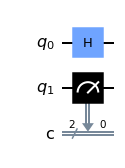

In [32]:
circ.draw('mpl')

## 